# Bootstrapping (Nonparametric Inference)

In statistics, bootstrapping is any test or metric that relies on random sampling with replacement. Bootstrapping allows assigning measures of accuracy (defined in terms of bias, variance, confidence intervals, prediction error or some other such measure) to sample estimates. This technique allows estimation of the sampling distribution of almost any statistic using random sampling methods. Generally, it falls in the broader class of resampling methods.

Bootstrapping is the practice of estimating properties of an estimator (such as its variance) by measuring those properties when sampling from an approximating distribution. One standard choice for an approximating distribution is the empirical distribution function of the observed data. In the case where a set of observations can be assumed to be from an independent and identically distributed population, this can be implemented by constructing a number of resamples with replacement, of the observed data set (and of equal size to the observed data set).

It may also be used for constructing hypothesis tests. It is often used as an alternative to statistical inference based on the assumption of a parametric model when that assumption is in doubt, or where parametric inference is impossible or requires complicated formulas for the calculation of standard errors.

- Random sampling with replacement*
- Resampling technique to simulate drawing new samples (where repeating experiments is not feasible or possible)
- Typically, the new sample has size *n*, where *n* is the size of the original dataset

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

## Sample mean, standard error of the mean,  and estimating the population mean

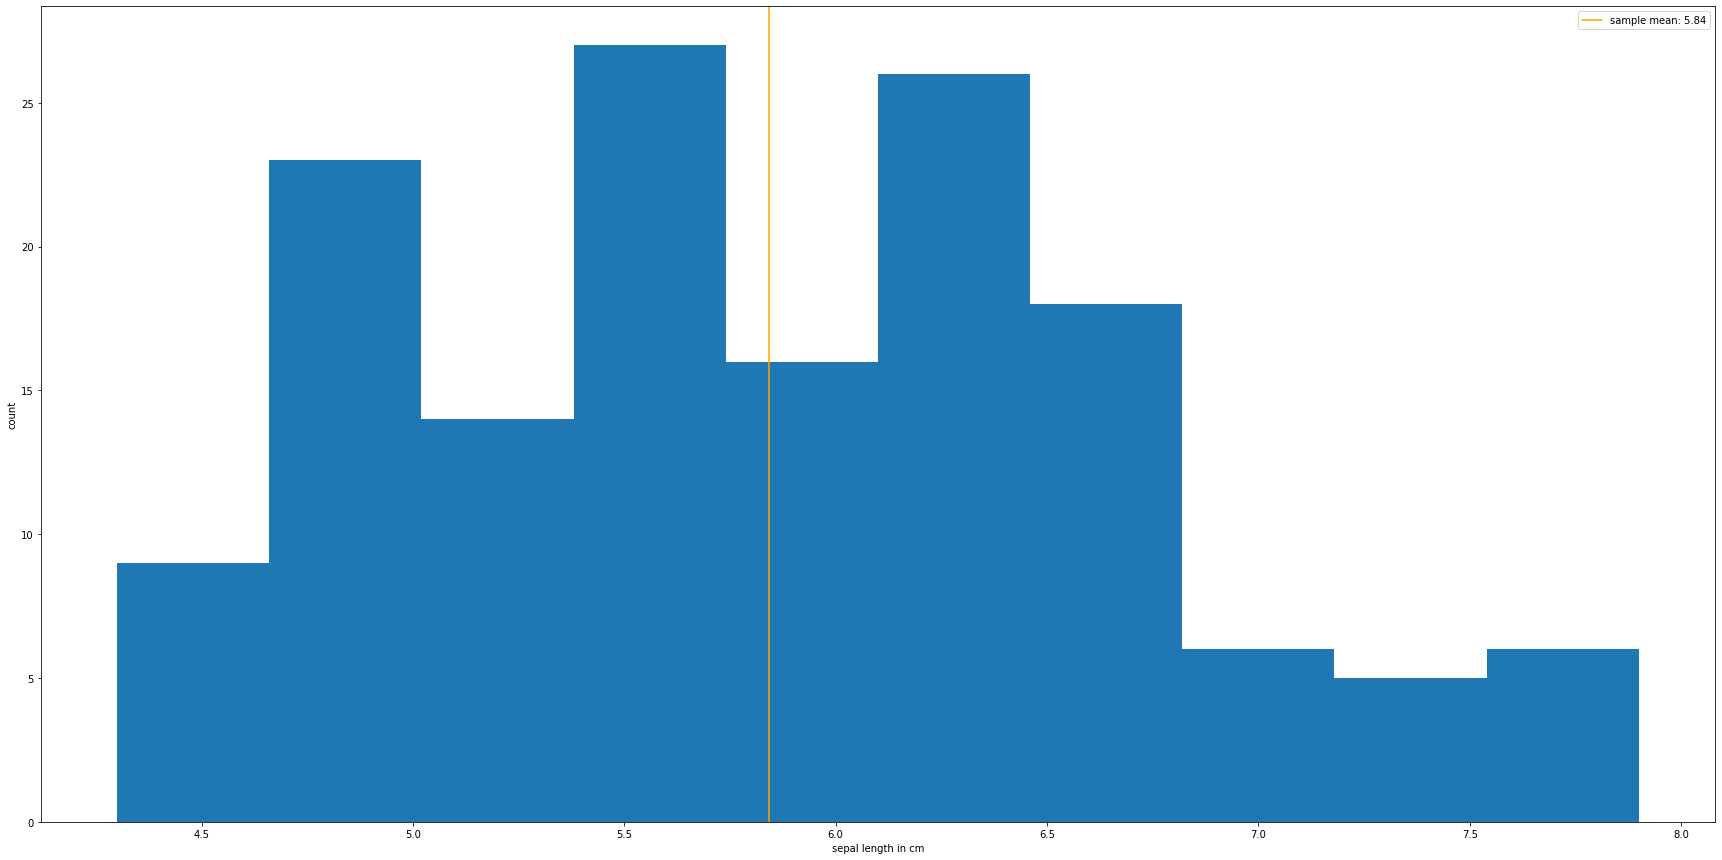

In [3]:
df = pd.read_csv('../datasets/iris/iris.csv')

x = df['sepal_length'].values
x_mean = np.mean(x)

plt.figure(figsize=(30,15))
plt.hist(x, bins=10)
plt.axvline(x_mean, color='orange', label='sample mean: %.2f' % x_mean)
plt.xlabel('sepal length in cm')
plt.ylabel('count')
plt.legend(loc=1)
plt.show()

#### Standard Error (SE)

$$SE_{\bar{x}} = \frac{s}{\sqrt{n}}$$

- the standard error *SE* (or *standard error of the mean*) estimates the standard deviation (*s*) of the sample mean ($\bar{x}$)
- i.e., the *SE* measures the variability when taking different samples from the population
- in other words, the *SE* measures the variability between samples, whereas the sample standard deviation measures the variability within a sample
- we use the standard error to judge how "good" our estimate of the population mean ($\mu$) is

In [4]:
se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
print('standard error', se)

standard error 0.0676113162275986


In [5]:
scipy.stats.sem(x)

0.0676113162275986

#### Bootstrapping and estimating the population mean

In [6]:
def bootstrap_means(x, n_bootstrap_samples, seed=None):

    rng = np.random.RandomState(seed)
    sample_means = np.zeros(shape=n_bootstrap_samples)
    
    for i in range(n_bootstrap_samples):
        boot_sample = rng.choice(x, size=x.shape[0], replace=True)
        # replicate is a general term for a statistic computed
        # from a bootstrap sample
        bootstrap_replicate = np.mean(boot_sample)
        sample_means[i] = bootstrap_replicate
    return sample_means

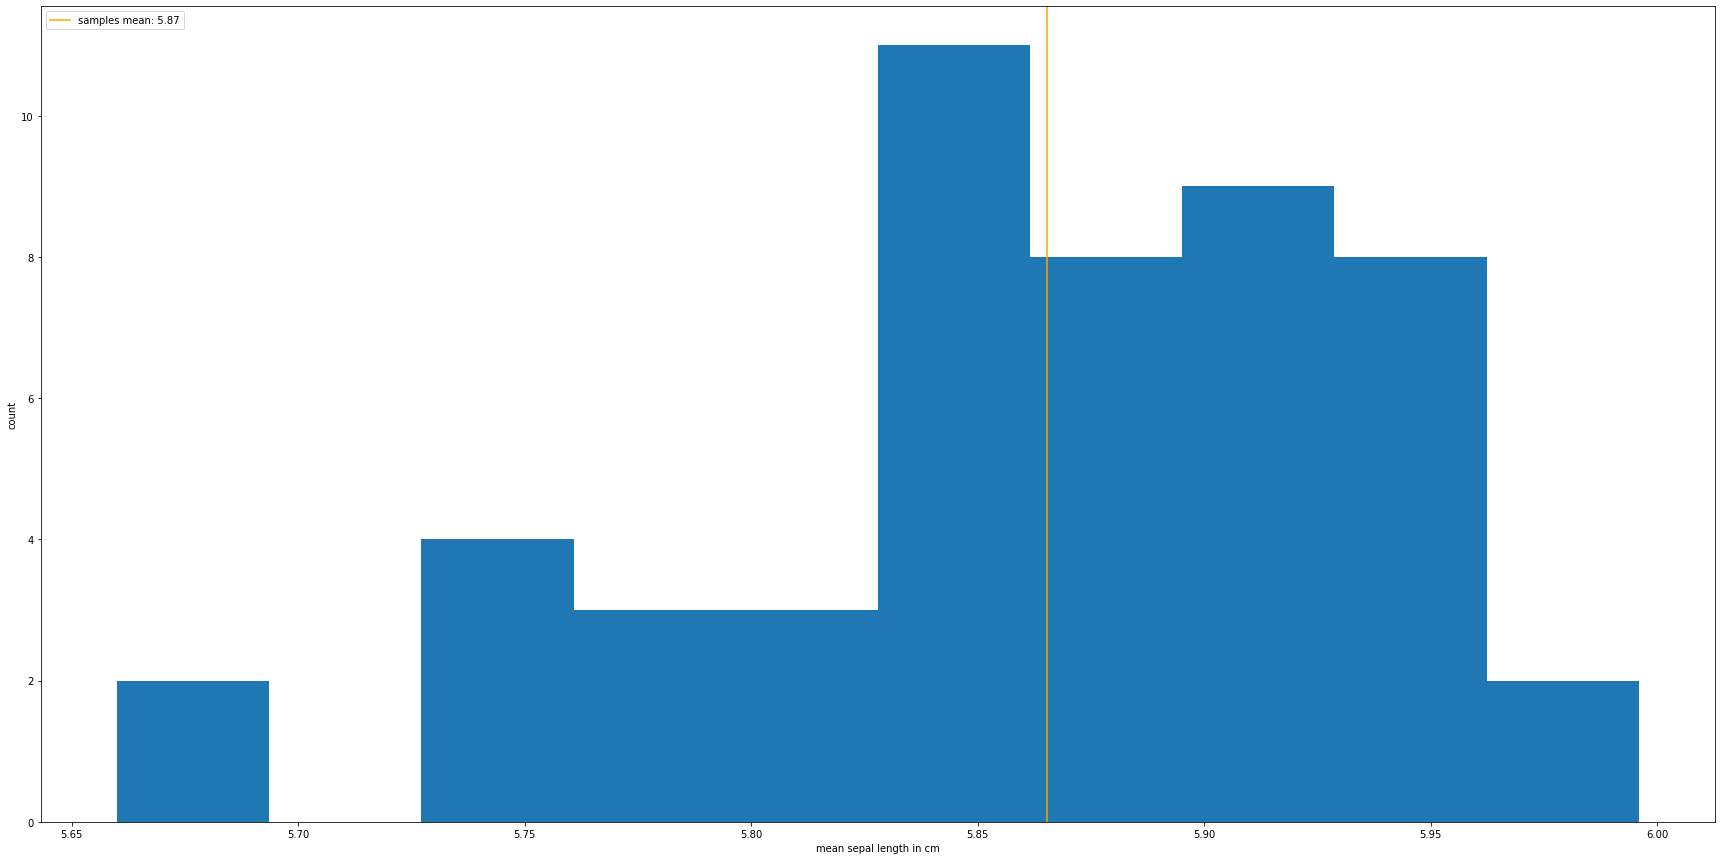

In [7]:
boot_50 = bootstrap_means(x, n_bootstrap_samples=50, seed=123)

boot_mean = np.mean(boot_50)


plt.figure(figsize=(30,15))
plt.hist(boot_50, bins=10)
plt.axvline(boot_mean, color='orange', label='samples mean: %.2f' % boot_mean)
plt.xlabel('mean sepal length in cm')
plt.ylabel('count')
plt.legend(loc=2)
plt.show()

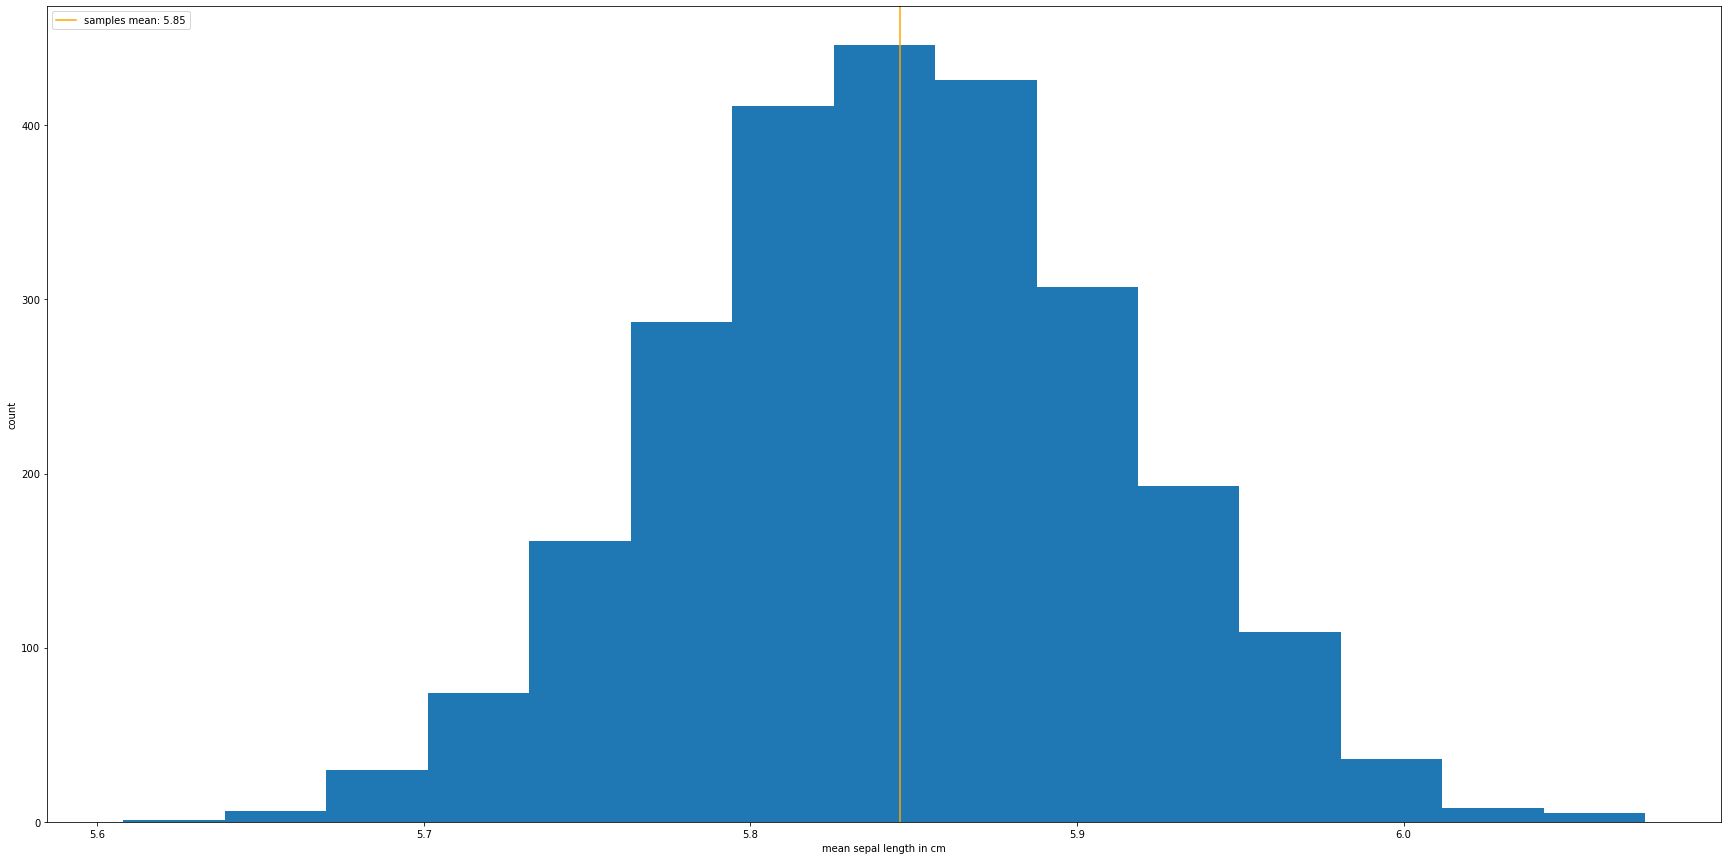

In [8]:
boot_2500 = bootstrap_means(x, n_bootstrap_samples=2500, seed=123)

boot_mean = np.mean(boot_2500)


plt.figure(figsize=(30,15))
plt.hist(boot_2500, bins=15)
plt.axvline(boot_mean, color='orange', label='samples mean: %.2f' % boot_mean)
plt.xlabel('mean sepal length in cm')
plt.ylabel('count')
plt.legend(loc=2)
plt.show()

- note: no matter how the sample is distributed, the sample mean follows a normal distribution

In [10]:
np.std(boot_2500, ddof=1)

0.06666436312360136

- remember, the standard deviation of the bootstrap replicates (means) estimates the standard error of the mean (which estimates the standard deviation of the population mean)

In [11]:
se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
print('standard error', se)

standard error 0.0676113162275986


In [12]:
def empirical_cdf(sample):
    x = np.sort(sample)
    y = np.arange(1, x.shape[0] + 1) / x.shape[0]
    return x, y

Text(0, 0.5, 'CDF')

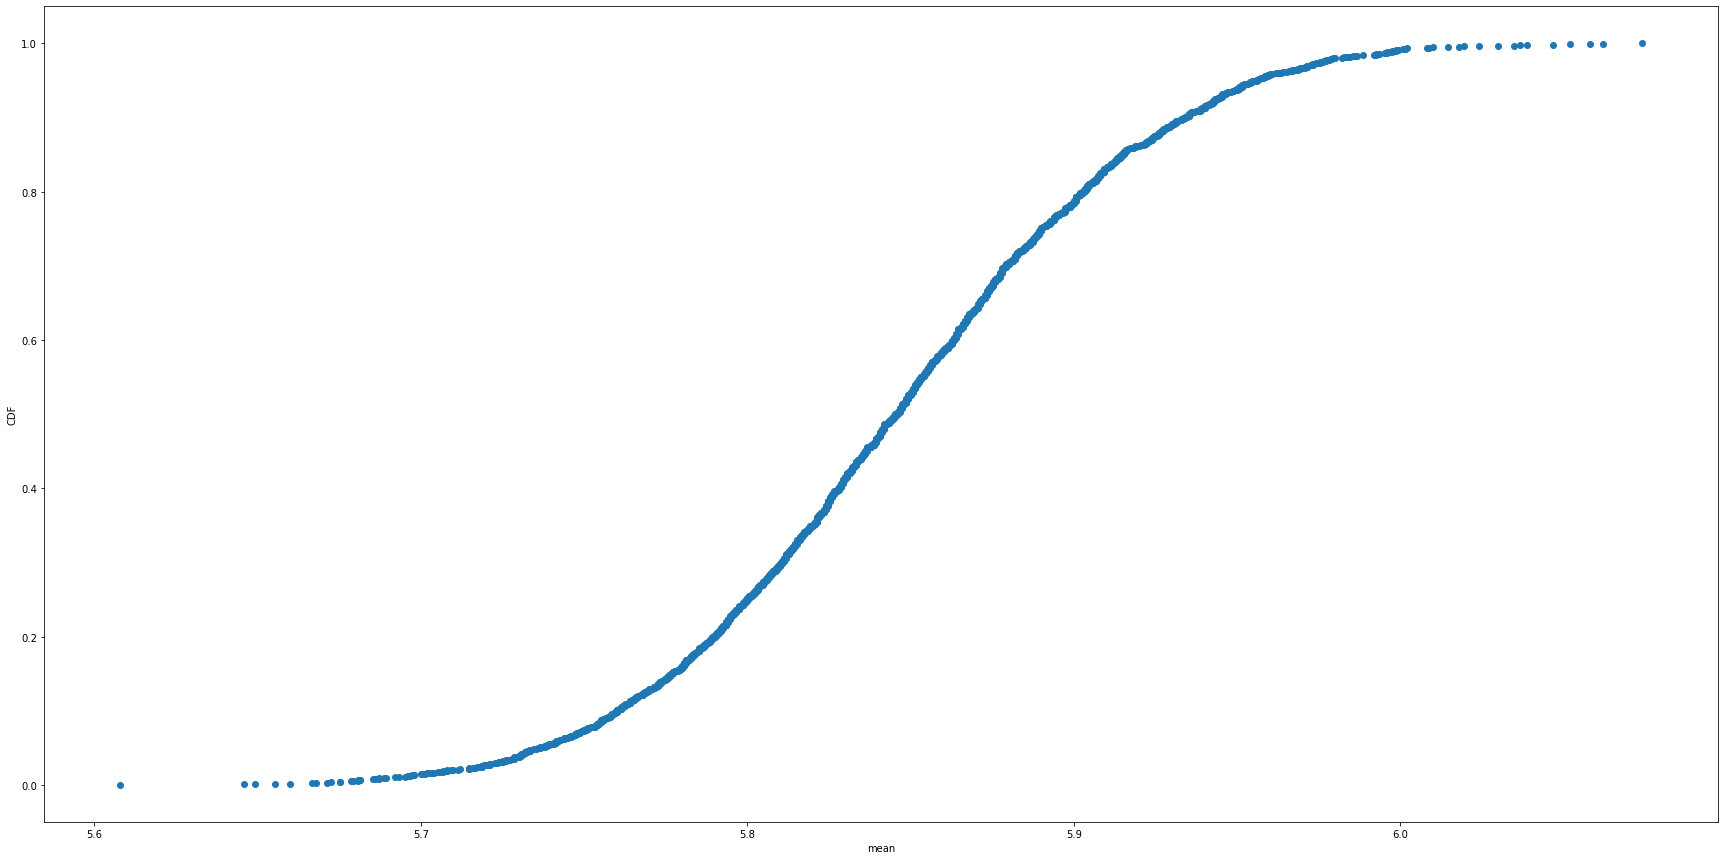

In [13]:
ecdf_x, ecdf_y = empirical_cdf(boot_2500)

plt.figure(figsize=(30,15))
plt.scatter(ecdf_x, ecdf_y)
plt.xlabel('mean')
plt.ylabel('CDF')

## Confidence Intervals

- 95% confidence interval: 95% of the sample means (if we would draw new samples / repeat the experiments) would fall within the confidence interval

####  From bootstrap replicates:

In [14]:
boot_2500 = bootstrap_means(x, n_bootstrap_samples=2500, seed=123)

lower, upper = np.percentile(boot_2500, [2.5, 97.5])

print('95%% confidence interval: [%.2f, %.2f]' % (lower, upper))

95% confidence interval: [5.72, 5.98]


#### From the original data (i.e., from a single sample):

In [15]:
def confidence_interval(x, ci=0.95):
    x_mean = np.mean(x)
    se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
    h = se * scipy.stats.t._ppf((1 + ci)/2. , x.shape[0])
    return x_mean - h, x_mean + h

lower, upper = confidence_interval(x, ci=0.95)


print('95%% confidence interval: [%.2f, %.2f]' % (lower, upper))

95% confidence interval: [5.71, 5.98]


In [16]:
se = np.std(x, ddof=1) / np.sqrt(x.shape[0])

lower, upper = scipy.stats.norm.interval(alpha=0.95, 
                                         loc=np.mean(x), 
                                         scale=se)

print('95%% confidence interval: [%.2f, %.2f]' % (lower, upper))

95% confidence interval: [5.71, 5.98]
